## Task: 2 - IPL Datasets
### RUGVED AI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# IPL dataset
data = pd.read_csv('data/IPL.csv')
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3656\2630781718.py:2: DtypeWarning: Columns (28,29,30,31,43,46,47,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/IPL.csv')


,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,131970,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,...,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,131971,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,...,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,131972,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
3,131973,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,3,0,NaN,0,2,0,"('BB McCullum', 'SC Ganguly')",NaN,False
4,131974,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,...,2,4,0,NaN,0,3,0,"('BB McCullum', 'SC Ganguly')",NaN,False


In [4]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 64 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         278205 non-null  int64  
 1   match_id           278205 non-null  int64  
 2   date               278205 non-null  object 
 3   match_type         278205 non-null  object 
 4   event_name         278205 non-null  object 
 5   innings            278205 non-null  int64  
 6   batting_team       278205 non-null  object 
 7   bowling_team       278205 non-null  object 
 8   over               278205 non-null  int64  
 9   ball               278205 non-null  int64  
 10  ball_no            278205 non-null  float64
 11  batter             278205 non-null  object 
 12  bat_pos            278205 non-null  int64  
 13  runs_batter        278205 non-null  int64  
 14  balls_faced        278205 non-null  int64  
 15  bowler             278205 non-null  object 
 16  va

In [ ]:
# Count the total number of matches conducted in 2008.
df['date'] = pd.to_datetime(df['date'])
total = df[df['date'].dt.year == 2008]
total2008 = total['match_id'].nunique()
total2008

58

In [6]:
# Find the cities where the maximum and minimum number of matches were conducted.
citycount = df.groupby('city')['match_id'].nunique()
max_city = citycount.idxmax()
min_city = citycount.idxmin()
max_city, min_city

('Mumbai', 'Bloemfontein')

In [6]:
# Find total count of matches city-wise.
ciitycount = df['city'].value_counts()
ciitycount

city
Mumbai            43374
Kolkata           23436
Delhi             22993
Chennai           22132
Hyderabad         19664
Jaipur            15194
Bangalore         14907
Chandigarh        14476
Unknown           12397
Pune              12239
Ahmedabad         10816
Abu Dhabi          8799
Bengaluru          8043
Lucknow            5235
Visakhapatnam      4000
Durban             3643
Dharamsala         3457
Dubai              3149
Centurion          2866
Rajkot             2381
Sharjah            2355
Navi Mumbai        2188
Mohali             2166
Indore             1965
Johannesburg       1940
Cuttack            1695
Port Elizabeth     1677
Ranchi             1671
Cape Town          1539
Raipur             1431
Guwahati           1223
Kochi              1155
Kanpur              921
Nagpur              742
Kimberley           726
East London         715
Bloemfontein        500
New Chandigarh      395
Name: count, dtype: int64

In [10]:
# Count the total number of normal and tied matches.
match_counts = df['result_type'].value_counts()
match_counts

result_type
tie          3896
no result     806
Name: count, dtype: int64

In [13]:
# Tally the toss decisions each team has taken.
toss_decisions = df.groupby('toss_winner')['toss_decision'].value_counts().unstack().fillna(0)
toss_decisions

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,14434.0,16295.0
Deccan Chargers,5756.0,4620.0
Delhi Capitals,3199.0,10850.0
Delhi Daredevils,6685.0,11863.0
Gujarat Lions,263.0,3323.0
Gujarat Titans,1422.0,5650.0
Kings XI Punjab,6450.0,13876.0
Kochi Tuskers Kerala,702.0,1058.0
Kolkata Knight Riders,9566.0,20795.0


In [15]:
# Find the players who have won ‘Player of the Match’ more than 3 times
player_of_match_counts = df['player_of_match'].value_counts()
players_more_than_3 = player_of_match_counts[player_of_match_counts > 3]
players_more_than_3

player_of_match
AB de Villiers    6170
CH Gayle          5186
RG Sharma         5134
MS Dhoni          4384
DA Warner         4329
                  ... 
WD Parnell         189
Ashwani Kumar      182
M Jansen           154
Suyash Sharma      147
DL Vettori         108
Name: count, Length: 309, dtype: int64

In [16]:
# Find all deliveries where the batsman scored a six.
six_runs = df[df['runs_batter'] == 6]
six_runs

,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
10,131980,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,...,17,10,0,NaN,14,9,0,"('BB McCullum', 'SC Ganguly')",NaN,False
20,131990,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,1,...,38,19,0,NaN,29,14,0,"('BB McCullum', 'SC Ganguly')",NaN,False
25,131995,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,6,...,50,24,0,NaN,35,16,0,"('BB McCullum', 'SC Ganguly')",NaN,False
60,132030,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,9,5,...,86,59,1,NaN,57,35,0,"('BB McCullum', 'RT Ponting')",NaN,False
65,132035,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,10,4,...,98,64,1,NaN,19,15,0,"('BB McCullum', 'RT Ponting')",NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278183,277934,1473511,2025-06-03,T20,Indian Premier League,2,Punjab Kings,Royal Challengers Bengaluru,16,3,...,142,99,5,MP Stoinis,6,1,0,"('MP Stoinis', 'Shashank Singh')",NaN,False
278193,277944,1473511,2025-06-03,T20,Indian Premier League,2,Punjab Kings,Royal Challengers Bengaluru,18,1,...,155,109,7,NaN,32,19,0,"('KA Jamieson', 'Shashank Singh')",NaN,False
278201,277952,1473511,2025-06-03,T20,Indian Premier League,2,Punjab Kings,Royal Challengers Bengaluru,19,3,...,168,117,7,NaN,45,27,0,"('KA Jamieson', 'Shashank Singh')",NaN,False
278203,277954,1473511,2025-06-03,T20,Indian Premier League,2,Punjab Kings,Royal Challengers Bengaluru,19,5,...,178,119,7,NaN,55,29,0,"('KA Jamieson', 'Shashank Singh')",NaN,False


In [18]:
# Compute the average runs scored in matches in all the venues
average_runs = df.groupby('venue')['runs_total'].mean()
average_runs

venue
Arun Jaitley Stadium                                                       1.353695
Arun Jaitley Stadium, Delhi                                                1.553543
Barabati Stadium                                                           1.343953
Barsapara Cricket Stadium, Guwahati                                        1.374489
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow      1.402865
Brabourne Stadium                                                          1.409883
Brabourne Stadium, Mumbai                                                  1.435544
Buffalo Park                                                               1.117483
De Beers Diamond Oval                                                      1.235537
Dr DY Patil Sports Academy                                                 1.204608
Dr DY Patil Sports Academy, Mumbai                                         1.340061
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium                   

In [20]:
# Find the umpires who umpired the maximum number of times.
umpire_counts = df['umpire'].value_counts()
max_umpire = umpire_counts.idxmax()
max_umpire

'Nitin Menon'

In [21]:
# Find the total number of matches played in each season.
season_matches = df.groupby(df['date'].dt.year)['match_id'].nunique()
season_matches

date
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
2021    60
2022    74
2023    74
2024    71
2025    74
Name: match_id, dtype: int64

In [22]:
# Find total runs scored in each season.
total_runs_per_season = df.groupby(df['date'].dt.year)['runs_total'].sum()
total_runs_per_season

date
2008    17937
2009    16353
2010    18883
2011    21154
2012    22453
2013    22602
2014    18931
2015    18353
2016    18862
2017    18786
2018    19901
2019    19434
2020    19416
2021    18637
2022    24395
2023    25688
2024    25971
2025    26527
Name: runs_total, dtype: int64

In [24]:
# Calculate total number of runs scored by each batsman and display top 10
batsman_runs = df.groupby('batter')['runs_batter'].sum()
top_10_batsmen = batsman_runs.sort_values(ascending=False).head(10)
top_10_batsmen

batter
V Kohli           8671
RG Sharma         7048
S Dhawan          6769
DA Warner         6567
SK Raina          5536
MS Dhoni          5439
KL Rahul          5235
AB de Villiers    5181
AM Rahane         5032
CH Gayle          4997
Name: runs_batter, dtype: int64

In [ ]:
# Compute the total number of wickets taken by each bowler.
bowler_wickets = df[df['player_out'] == 1].groupby('bowler')['player_out'].sum()
bowler_wickets.sort_values(ascending=False)

Series([], Name: player_out, dtype: object)

In [27]:
# Compute batting averages and display top 10.
batsman_stats = df.groupby('batter').agg({'runs_batter': 'sum', 'match_id': 'nunique'})
batsman_stats['batting_average'] = batsman_stats['runs_batter'] / batsman_stats['match_id']
top_10_batting_averages = batsman_stats.sort_values(by='batting_average', ascending=False).head(10)
top_10_batting_averages

,runs_batter,match_id,batting_average
batter,,,
Vivrant Sharma,69,1,69.000000
B Sai Sudharsan,1793,40,44.825000
KL Rahul,5235,135,38.777778
DP Conway,1080,28,38.571429
LMP Simmons,1079,29,37.206897
SE Marsh,2489,69,36.072464
HM Amla,577,16,36.062500
V Suryavanshi,252,7,36.000000
RD Gaikwad,2502,70,35.742857


Text(0.5, 1.0, 'Toss Decisions Across All Seasons')

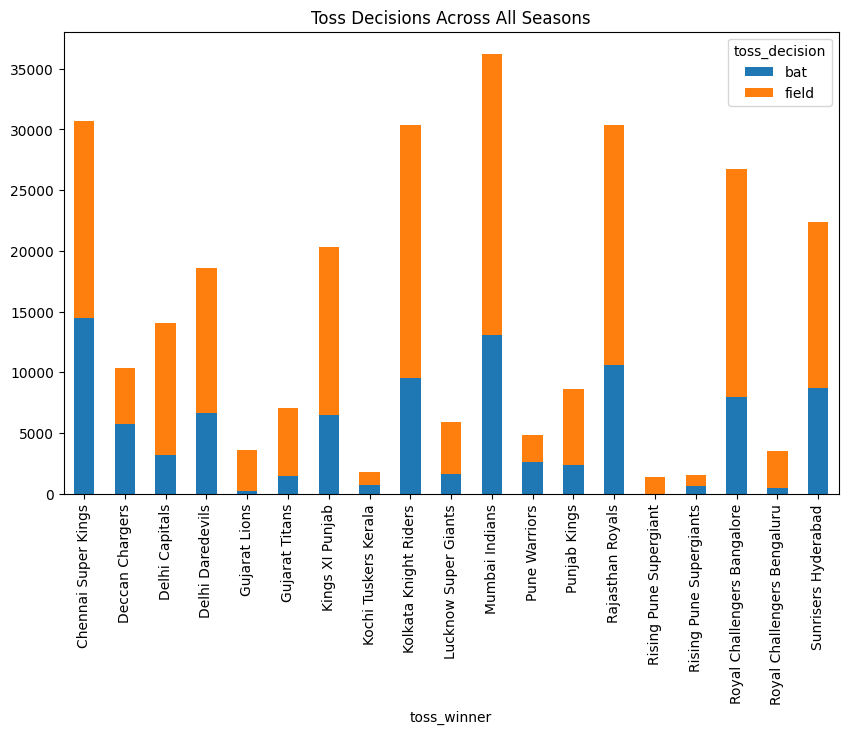

In [28]:
# Visualize toss decisions across all seasons.
toss_decisions.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Toss Decisions Across All Seasons')

Text(0.5, 1.0, 'Distribution of Match Winners')

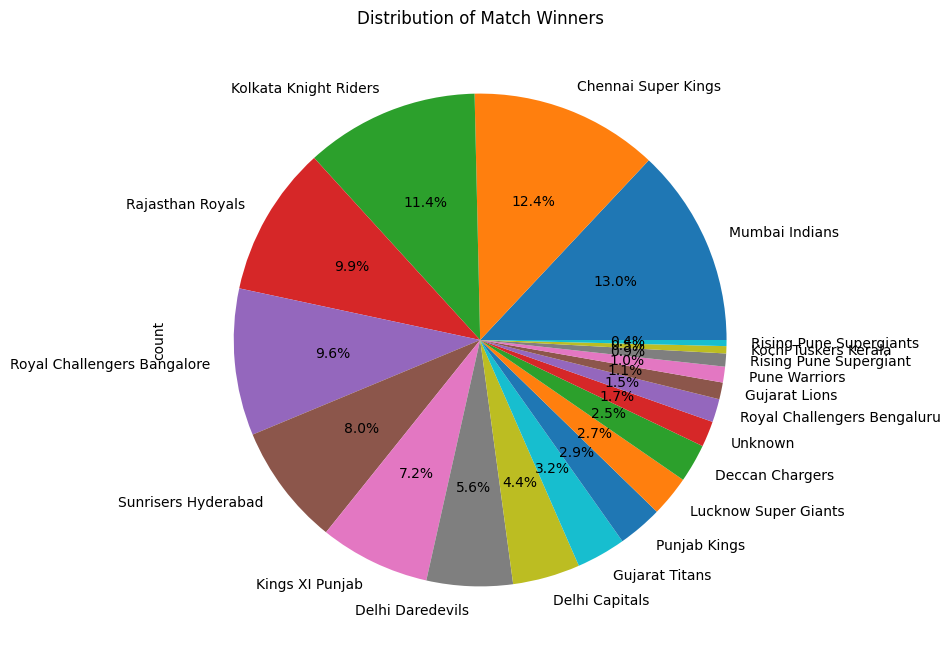

In [31]:
# Find the distribution of the teams who won the matches.
match_winners = df['match_won_by'].value_counts()
match_winners.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Distribution of Match Winners')

Text(0.5, 1.0, 'Toss Outcomes of All Teams')

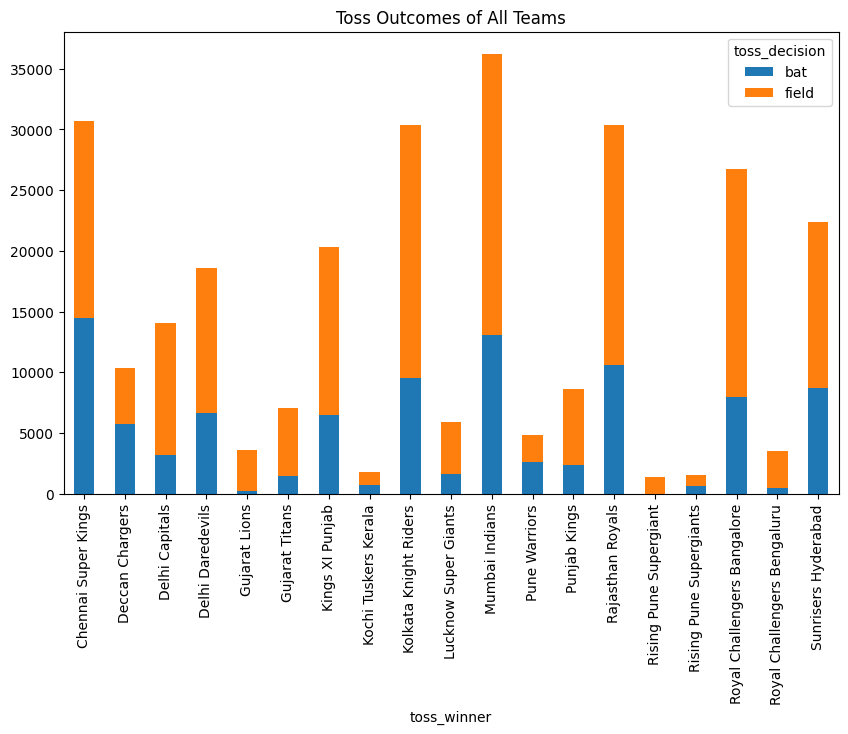

In [34]:
# Visualize the toss outcomes of all teams.
toss_winner = df.groupby('toss_winner')['toss_decision'].value_counts().unstack().fillna(0)
toss_winner.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Toss Outcomes of All Teams')

<Axes: xlabel='match_won_by'>

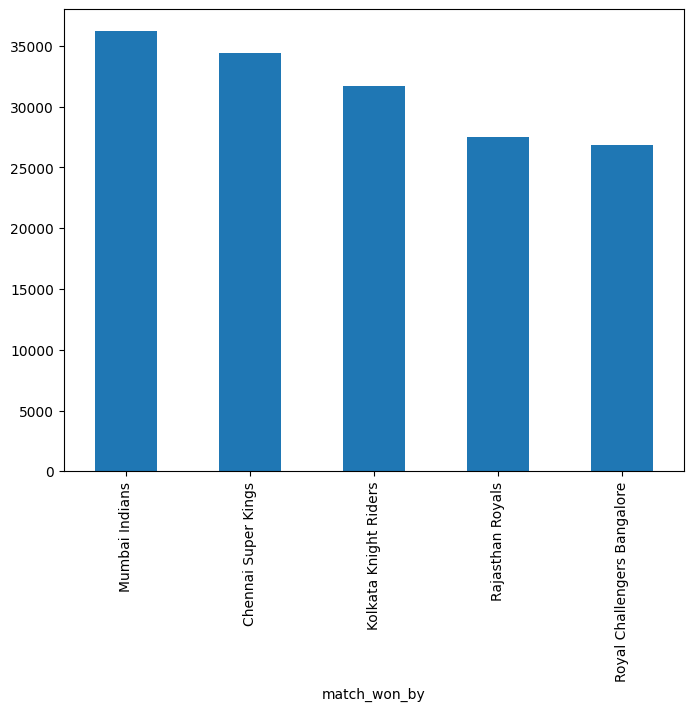

In [35]:
# Visualize the top 5 teams with the most wins across all seasons.
top_5_teams = match_winners.head(5)
top_5_teams.plot(kind='bar', figsize=(8,6))

7. Find the team which won the match by the highest and lowest number of
runs.
8. Calculate mean, median and standard deviation of ‘win_by_runs’
9. Compute batting averages and display top 10.
10. Visualize Total Matches vs Winning Matches vs Win Rate for all teams

In [ ]:
ciitycount = df['city'].value_counts()